# 1. Lakukan Principal Component Analysis untuk dataset yang anda pilih di Tugas 1

Import Data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Tentukan path file CSV yang ada di Google Drive
file_path = '/content/drive/MyDrive/Akademik/Dataset/cars_clus.csv'
# Membaca dataset
cars_data = pd.read_csv(file_path)
# Menampilkan 5 baris pertama dari dataset
cars_data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


In [4]:
print(cars_data)

    manufact     model   sales  resale    type   price engine_s horsepow  \
0      Acura   Integra  16.919   16.36       0    21.5      1.8      140   
1      Acura        TL  39.384  19.875       0    28.4      3.2      225   
2      Acura        CL  14.114  18.225       0  $null$      3.2      225   
3      Acura        RL   8.588  29.725       0      42      3.5      210   
4       Audi        A4  20.397  22.255       0   23.99      1.8      150   
..       ...       ...     ...     ...     ...     ...      ...      ...   
154    Volvo       V70  17.531  $null$       0    28.8      2.4      168   
155    Volvo       C70   3.493  $null$       0    45.5      2.3      236   
156    Volvo       S80  18.969  $null$       0      36      2.9      201   
157      NaN    newCar  $null$  $null$  $null$    21.5      1.5       76   
158      NaN  newTruck  $null$  $null$  $null$    34.2      3.5      167   

    wheelbas width length curb_wgt fuel_cap mpg lnsales  partition  
0      101.2  67.3

In [14]:
# Memilih fitur numerik yang digunakan untuk PCA
features = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas',
            'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']

# Menggunakan variabel features sebagai fitur
X = cars_data.loc[:, features]

# Menghapus baris dengan nilai NaN pada fitur yang digunakan
X_cleaned = X.dropna()

# Standarisasi fitur
X_scaled = StandardScaler().fit_transform(X_cleaned)

# Menggunakan PCA untuk mengurangi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)

# Mentrasformasi data X menjadi 2 komponen utama
principalComponents = pca.fit_transform(X_scaled)

# Membuat DataFrame baru yang berisi 2 komponen utama
principalDF = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Menggabungkan data PCA dan target ke dalam DataFrame final (menggunakan 'type' sebagai label)
finalDF = pd.concat([principalDF, cars_data.loc[X_cleaned.index, ['type']]], axis=1)

# Menampilkan jumlah data berdasarkan kategori 'type'
print(cars_data.groupby('type').size())

type
$null$      2
0         116
1          41
dtype: int64


Kode ini melakukan Principal Component Analysis (PCA) untuk mengurangi jumlah fitur dalam dataset cars_clus menjadi dua komponen utama. Setelah menghapus baris dengan data yang hilang, fitur numerik distandarisasi agar lebih mudah dianalisis. Kemudian, data diproyeksikan ke dalam dua dimensi menggunakan PCA. Hasilnya digabungkan dengan kolom type (yang menunjukkan jenis mobil) untuk melihat perbedaan antar jenis mobil berdasarkan komponen utama. Selain itu, jumlah mobil di setiap kategori type juga dihitung.

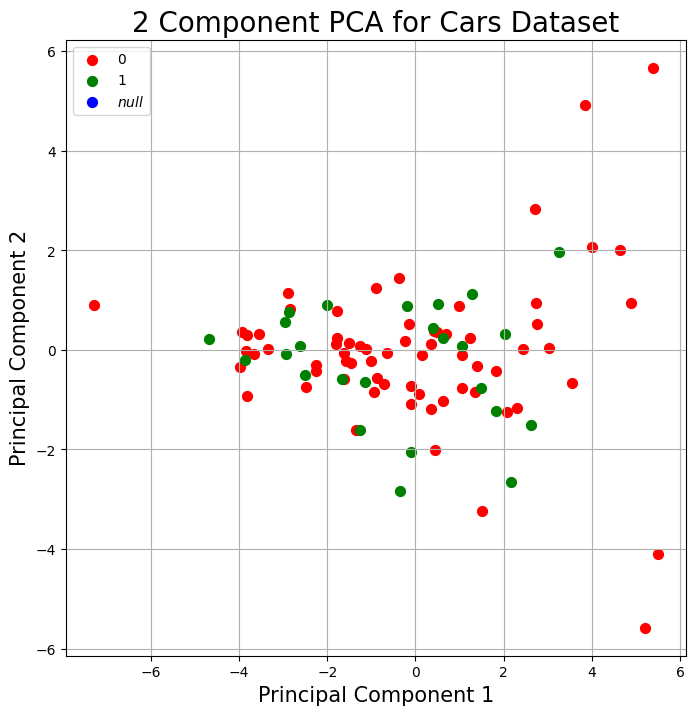

In [15]:
# Membuat figure dan axis untuk plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

# Set labels dan title untuk plot
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA for Cars Dataset', fontsize=20)

# Mendefinisikan targets (kategori 'type' pada dataset cars) dan warna untuk setiap kategori
targets = cars_data['type'].unique()  # Mengambil semua jenis mobil yang berbeda dalam kolom 'type'
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Sesuaikan jumlah warna dengan jumlah kategori

# Loop untuk setiap target class dan plot titik-titiknya
for target, color in zip(targets, colors):
    indicesToKeep = finalDF['type'] == target  # Memilih data berdasarkan kategori 'type'
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'],
               finalDF.loc[indicesToKeep, 'principal component 2'],
               c=color, label=target, s=50)

# Menambahkan legend dan grid ke plot
ax.legend(targets)
ax.grid()

# Menampilkan plot
plt.show()

Kode ini digunakan untuk membuat scatter plot yang menunjukkan hasil Principal Component Analysis (PCA) pada dataset cars_clus. Di plot ini, setiap titik mewakili sebuah mobil yang telah diproyeksikan ke dalam dua komponen utama. Sumbu X dan Y mewakili dua komponen utama yang menyederhanakan data. Setiap jenis mobil (misalnya, sedan, SUV, dll.) diberi warna berbeda agar mudah dibedakan. Dengan menambahkan legenda dan grid, plot ini membantu kita untuk melihat bagaimana mobil dari berbagai jenis dikelompokkan setelah proses PCA.

In [16]:
pca.explained_variance_ratio_

array([0.5481677 , 0.22568975])

menunjukkan seberapa besar kontribusi setiap komponen utama dalam menjelaskan variasi atau keragaman data setelah melakukan PCA.

In [17]:
# Membuat DataFrame untuk hasil PCA (2 komponen utama)
columns_pca = ['Principal Component 1', 'Principal Component 2']
df_pca = pd.DataFrame(principalComponents, columns=columns_pca)

# Menampilkan DataFrame hasil PCA
print(df_pca)

     Principal Component 1  Principal Component 2
0                -2.838303               0.832592
1                 0.420676               0.379565
2                 1.794607               0.756941
3                -1.775249               0.773108
4                 1.233551               0.245853
..                     ...                    ...
112              -2.960836               0.563034
113              -2.611602               0.076550
114              -1.610288              -0.061117
115              -2.898550               1.145653
116              -2.860814               0.757960

[117 rows x 2 columns]
